# Data Preprocessing

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [15]:
# Load the dataset
data_path = os.path.abspath(os.path.join(os.pardir, 'data/Physical_Activity_Monitoring_unlabeled.csv'))
raw = pd.read_csv(data_path)
print(f"There are {len(raw)} entries in this dataset")
raw.head()

There are 534601 entries in this dataset


,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [16]:
# Drop columns that are not useful
raw.drop(["timestamp", "subject_id"], axis=1, inplace=True)

### Imputation

In [10]:
# Create a copy of the raw data
raw_imputed = raw.copy()

# Fill the missing value with median due to skewness
for col in raw_imputed.columns:
    col_median = raw_imputed[col].median()
    raw_imputed[col].fillna(col_median, inplace=True)

# Check for successful imputation
raw_imputed.isna().sum().head()

handTemperature    0
handAcc16_1        0
handAcc16_2        0
handAcc16_3        0
handAcc6_1         0
dtype: int64

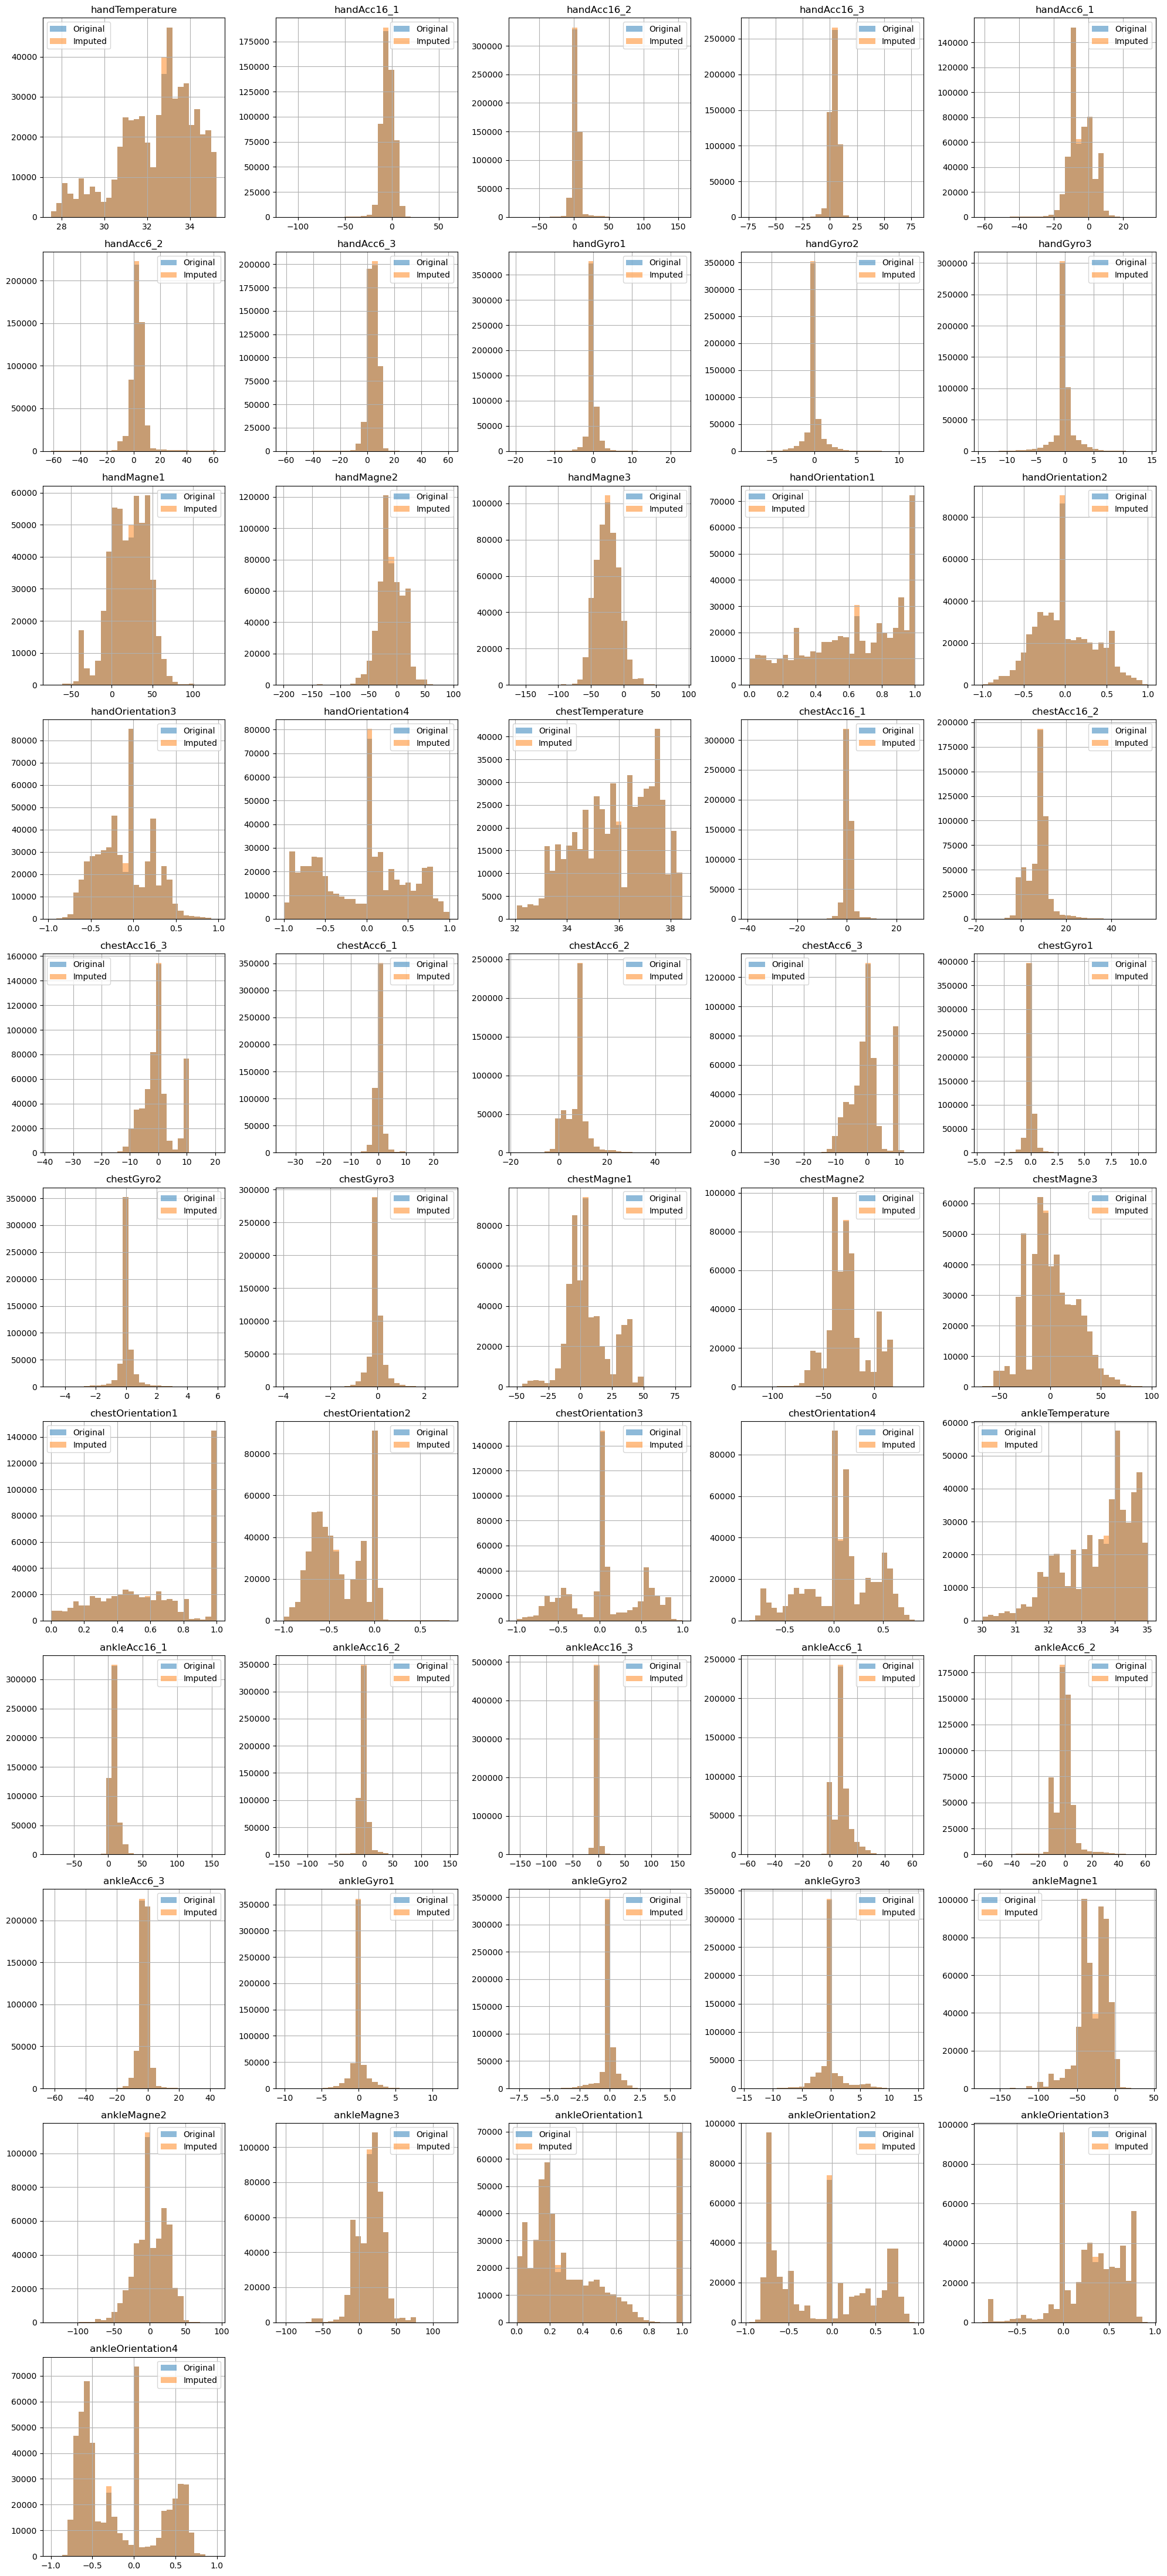

In [11]:
def plot_hist_comparison(df1, df2, df1_label='Original', df2_label='Imputed'):
    # Ensure both dataframes have the same columns
    assert df1.columns.equals(df2.columns), "DataFrames must have the same columns"
    
    # Plot histograms for each column
    data_columns = df1.columns

    # Determine the number of rows and columns for subplots
    n_cols = 5
    n_rows = int(np.ceil(len(data_columns) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

    for i, column in enumerate(data_columns):
        ax = axes[i // n_cols, i % n_cols]
        df1[column].hist(ax=ax, bins=30, alpha=0.5, label=df1_label)
        df2[column].hist(ax=ax, bins=30, alpha=0.5, label=df2_label)
        ax.set_title(column)
        ax.legend()

    # Hide any unused subplots
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j // n_cols, j % n_cols])

    plt.tight_layout()
    plt.show()


# Compare df before and after imputation
plot_hist_comparison(raw, raw_imputed)

### Feature scaling

In [12]:
# Apply standard scaler for PCA
scaler = StandardScaler()
raw_scaled = pd.DataFrame(scaler.fit_transform(raw_imputed))
raw_scaled.columns = raw_imputed.columns
raw_scaled.head(5)

,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,...,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
0,1.384305,0.759815,0.586093,0.511568,0.765322,0.618266,0.535769,-0.011363,-0.026535,-0.000454,...,0.027415,0.010001,0.013757,0.737324,1.136372,-1.147394,-0.509487,0.786365,1.338156,-0.707776
1,-1.546635,0.053120,0.072379,1.100348,-0.225564,0.000756,0.694746,0.108048,-0.438180,-0.007992,...,-0.352010,-1.034041,0.878232,-0.211915,-0.805266,-0.898181,0.727565,-0.853025,0.297799,-0.536125
2,1.098360,0.346162,-1.784516,-0.866257,0.366389,-1.872691,-0.837792,0.025049,0.014702,-0.007133,...,0.050088,0.035700,-0.004369,0.515480,0.639777,0.591121,-0.731142,1.374742,0.262592,1.677964
3,-0.295624,-1.253461,0.363172,-0.833334,-1.310220,0.394448,-0.899065,1.492102,-0.085675,-1.135790,...,3.084684,-0.213308,-1.722029,0.103991,1.452715,0.369159,0.188631,1.566107,0.008315,1.116458
4,0.597955,0.629512,0.753765,0.083382,0.642935,0.782390,0.146692,0.001628,-0.038986,-0.020281,...,-0.003932,0.005845,-0.002970,0.569341,-0.274929,-0.209193,-0.626844,-1.178430,-0.147386,-0.890807
